<table>
<tr>                                                                                   
     <th>
         <div style='padding:15px;color:#030aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'><a href="https://www.kaggle.com/datasets/uciml/mushroom-classification">Classification des Champignons</a></div>
     </th>
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/champignon.jpg" width="96"></th>
 </tr>
</table>

<div style='text-align: center'>
<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/schéma_champignon.jpg" width="512">
</div>


<div style='padding:15px;color:#030aa7;font-size:100%;text-align: left;font-family: Georgia, serif'><a href="https://archive.ics.uci.edu/dataset/73/mushroom">Veuillez vous référer à la page <span style="font-weight: bold; color: blue">UC Irvine Machine Learning Repository</span>
 officielle pour plus de détails.</a></div>


# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Introduction</div></b>
## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Import libriries </div></b>

In [1]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, sys, time, copy as cp, pickle,re
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

import plotly.express as px
import plotly.graph_objects as go

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Outils du document</div></b>

In [3]:
sys.path.append(os.path.abspath('../outils/'))
from prjFormation import palette

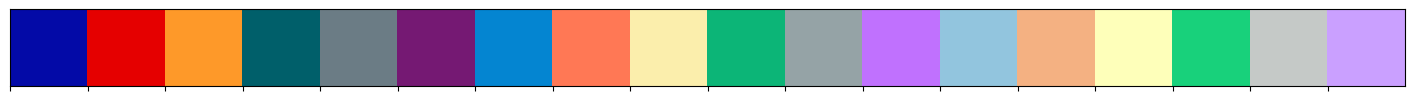

In [4]:
# palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
#             "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
#             "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
#           ]
sns.palplot(sns.color_palette(palette[:18]))

In [5]:
from prjFormation import initProjet,affichageDonnees2d,affichageDonnees3d,createLinkageMatrix, afficheDendrogram, affichageDistribution,afficheColonneCible, add_median_labels, formatPct

In [6]:
from classificationBinaires import initDictionnaireClassificateurs, executionEssaiComparaisonClassificateurs,\
                                   affichageEvolutionMetriques, affichageROC, executeValidationCroisee,afficheSeparationsBinaires

In [7]:
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

warnings.filterwarnings(action="ignore")
sns.set_style('darkgrid')
sns.set(font_scale=2)

In [8]:
projet = initProjet(repertoireRacine='.',nomProjet='ClassificationDesChampignons-Classification')

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Lecture des données</div></b>
<table>
    <CAPTION style='padding:15px;color:#030aa7;font-size:150%;text-align: left;font-weight: bold;font-family: Georgia, serif'>mushrooms.csv</CAPTION>    
<tr>                                                                                   
     <th>
        <table>
        <tr>                                                                                   
             <th  style="text-align:left;background-color:#053061;color:white;">Colonne initiale </th>
             <th  style="text-align:left;background-color:#053061;color:white;">Description</th>
        </tr>
        <tr>
            <th  style="text-align:left;color:red;font-style: italic">poisonous</th>               
            <th  style="text-align:left;color:red;font-style: italic">edible=e, poisonous=p</th>
        </tr>    
        <tr>
            <th  style="text-align:left">cap-shape</th>               
            <th  style="text-align:left">bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-cap-shape.jpg" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">cap-surface</th>             
            <th  style="text-align:left">fibrous=f,grooves=g,scaly=y,smooth=s<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-cap-surface.jpg" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">cap-color</th>               
            <th  style="text-align:left">brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">bruises</th>                 
            <th  style="text-align:left">bruises=t,no=f</th>
        </tr>    
        <tr>
            <th  style="text-align:left">odor</th>                    
            <th  style="text-align:left">almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s</th>
        </tr>    
        <tr>
            <th  style="text-align:left">gill-attachment</th>         
            <th  style="text-align:left">attached=a,descending=d,free=f,notched=n<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-gill-attachment.png" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">gill-spacing</th>            
            <th  style="text-align:left">close=c,crowded=w,distant=d<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-gill-spacing.jpg" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">gill-size</th>               
            <th  style="text-align:left">broad=b,narrow=n</th>
        </tr>    
        <tr>
            <th  style="text-align:left">gill-color</th>              
            <th  style="text-align:left">black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-shape</th>             
            <th  style="text-align:left">enlarging=e,tapering=t</th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-root</th>              
            <th  style="text-align:left">bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-stalk.jpg" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-surface-above-ring</th>
            <th  style="text-align:left">fibrous=f,scaly=y,silky=k,smooth=s</th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-surface-below-ring</th>
            <th  style="text-align:left">fibrous=f,scaly=y,silky=k,smooth=s</th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-color-above-ring</th>  
            <th  style="text-align:left">brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">stalk-color-below-ring</th>  
            <th  style="text-align:left">brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">veil-type</th>               
            <th  style="text-align:left">partial=p,universal=u</th>
        </tr>    
        <tr>
            <th  style="text-align:left">veil-color</th>              
            <th  style="text-align:left">brown=n,orange=o,white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">ring-number</th>             
            <th  style="text-align:left">none=n,one=o,two=t</th>
        </tr>    
        <tr>
            <th  style="text-align:left">ring-type</th>               
            <th  style="text-align:left">cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z<br><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/mushroom-ring-type.jpg" width="512"></th>
        </tr>    
        <tr>
            <th  style="text-align:left">spore-print-color</th>       
            <th  style="text-align:left">black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">population</th>              
            <th  style="text-align:left">abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y</th>
        </tr>    
        <tr>
            <th  style="text-align:left">habitat</th>                 
            <th  style="text-align:left">grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d</th>
        </tr>    
        </table>
     </th>
     <th style="vertical-align: top"><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/champignons_structure.jpeg" width="1024"></th>
 </tr>
</table>



In [9]:
dictValeurs = {}
dictValeurs['cible']                   ={'comestible':'e','toxique':'p'} 
dictValeurs['cap_shape']               ={'bell':'b','conical':'c','convex':'x','flat':'f','knobbed':'k','sunken':'s'}
dictValeurs['cap_surface']             ={'fibrous':'f','grooves':'g','scaly':'y','smooth':'s'}
dictValeurs['cap_color']               ={'brown':'n','buff':'b','cinnamon':'c','gray':'g','green':'r','pink':'p','purple':'u','red':'e','white':'w','yellow':'y'}
dictValeurs['bruises']                 ={'bruises':'t','no':'f'}
dictValeurs['odor']                    ={'almond':'a','anise':'l','creosote':'c','fishy':'y','foul':'f','musty':'m','none':'n','pungent':'p','spicy':'s'}
dictValeurs['gill_attachment']         ={'attached':'a','descending':'d','free':'f','notched':'n'}
dictValeurs['gill_spacing']            ={'close':'c','crowded':'w','distant':'d'}
dictValeurs['gill_size']               ={'broad':'b','narrow':'n'}
dictValeurs['gill_color']              ={'black':'k','brown':'n','buff':'b','chocolate':'h','gray':'g','green':'r','orange':'o','pink':'p','purple':'u','red':'e','white':'w','yellow':'y'}
dictValeurs['stalk_shape']             ={'enlarging':'e','tapering':'t'}
dictValeurs['stalk_root']              ={'bulbous':'b','club':'c','cup':'u','equal':'e','rhizomorphs':'z','rooted':'r','missing':'?'}
dictValeurs['stalk_surface_above_ring']={'fibrous':'f','scaly':'y','silky':'k','smooth':'s'}
dictValeurs['stalk_surface_below_ring']={'fibrous':'f','scaly':'y','silky':'k','smooth':'s'}
dictValeurs['stalk_color_above_ring']  ={'brown':'n','buff':'b','cinnamon':'c','gray':'g','orange':'o','pink':'p','red':'e','white':'w','yellow':'y'}
dictValeurs['stalk_color_below_ring']  ={'brown':'n','buff':'b','cinnamon':'c','gray':'g','orange':'o','pink':'p','red':'e','white':'w','yellow':'y'}
dictValeurs['veil_type']               ={'partial':'p','universal':'u'}
dictValeurs['veil_color']              ={'brown':'n','orange':'o','white':'w','yellow':'y'}
dictValeurs['ring_number']             ={'none':'n','one':'o','two':'t'}
dictValeurs['ring_type']               ={'cobwebby':'c','evanescent':'e','flaring':'f','large':'l','none':'n','pendant':'p','sheathing':'s','zone':'z'}
dictValeurs['spore_print_color']       ={'black':'k','brown':'n','buff':'b','chocolate':'h','green':'r','orange':'o','purple':'u','white':'w','yellow':'y'}
dictValeurs['population']              ={'abundant':'a','clustered':'c','numerous':'n','scattered':'s','several':'v','solitary':'y'}
dictValeurs['habitat']                 ={'grasses':'g','leaves':'l','meadows':'m','paths':'p','urban':'u','waste':'w','woods':'d'}

def reverseDict(dictValeurs, dictRValeurs, dictNValeurs):
    for colonne in dictValeurs:
        dictRValeurs[colonne] =  { dictValeurs[colonne][cle]:cle for cle in dictValeurs[colonne]}
        dictNValeurs[colonne] =  { cle:i for i,cle in enumerate(dictValeurs[colonne])}

dictRValeurs,dictNValeurs = {},{}
reverseDict(dictValeurs, dictRValeurs, dictNValeurs)

In [10]:
donnees = pd.read_csv('../donnees/mushrooms.csv')
donnees.columns = ['cible']+[colonne.replace('-','_') for colonne in  donnees.columns[1:]]

In [11]:
for colonne in donnees.columns:
    donnees[colonne] = donnees[colonne].apply( lambda x : dictRValeurs[colonne][x])

In [12]:
donnees.sample(5)

,cible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
850,comestible,bell,smooth,white,bruises,anise,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,scattered,grasses
5443,comestible,convex,scaly,pink,bruises,none,free,close,broad,red,...,smooth,red,red,partial,white,two,evanescent,white,clustered,waste
2155,comestible,convex,fibrous,gray,bruises,none,free,close,broad,pink,...,smooth,gray,pink,partial,white,one,pendant,brown,several,woods
4473,toxique,convex,scaly,yellow,no,foul,free,close,broad,gray,...,silky,brown,buff,partial,white,one,large,chocolate,several,paths
40,comestible,bell,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,scattered,grasses


In [13]:
for col in donnees.columns:
    print(f'{col:26s} {donnees[col].sort_values().nunique():4d} {donnees[col].sort_values().unique()}')

cible                         2 ['comestible' 'toxique']
cap_shape                     6 ['bell' 'conical' 'convex' 'flat' 'knobbed' 'sunken']
cap_surface                   4 ['fibrous' 'grooves' 'scaly' 'smooth']
cap_color                    10 ['brown' 'buff' 'cinnamon' 'gray' 'green' 'pink' 'purple' 'red' 'white'
 'yellow']
bruises                       2 ['bruises' 'no']
odor                          9 ['almond' 'anise' 'creosote' 'fishy' 'foul' 'musty' 'none' 'pungent'
 'spicy']
gill_attachment               2 ['attached' 'free']
gill_spacing                  2 ['close' 'crowded']
gill_size                     2 ['broad' 'narrow']
gill_color                   12 ['black' 'brown' 'buff' 'chocolate' 'gray' 'green' 'orange' 'pink'
 'purple' 'red' 'white' 'yellow']
stalk_shape                   2 ['enlarging' 'tapering']
stalk_root                    5 ['bulbous' 'club' 'equal' 'missing' 'rooted']
stalk_surface_above_ring      4 ['fibrous' 'scaly' 'silky' 'smooth']
stalk_surface_below

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Effacement d'une variable inutile</div></b>

In [14]:
donnees['veil_type'].describe()

count        8124
unique          1
top       partial
freq         8124
Name: veil_type, dtype: object

In [15]:
donnees['veil_type'].unique()

array(['partial'], dtype=object)

In [16]:
donnees.drop(columns='veil_type',inplace=True)

In [17]:
donnees.sample(5)

,cible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
7587,toxique,knobbed,scaly,red,no,spicy,free,close,narrow,buff,...,smooth,silky,pink,pink,white,one,evanescent,white,several,paths
3196,comestible,convex,fibrous,brown,bruises,none,free,close,broad,purple,...,smooth,smooth,white,white,white,one,pendant,black,solitary,woods
7785,toxique,knobbed,smooth,brown,no,spicy,free,close,narrow,buff,...,smooth,smooth,white,pink,white,one,evanescent,white,several,leaves
6683,toxique,flat,smooth,red,no,foul,free,close,narrow,buff,...,silky,silky,white,white,white,one,evanescent,white,several,leaves
4159,comestible,flat,scaly,brown,bruises,none,free,close,broad,purple,...,smooth,smooth,gray,pink,white,one,pendant,black,solitary,woods


## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Variables qualitatives</div></b>

In [18]:
qualitatives = donnees.columns[1:]
cible = 'cible'

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Démarche pour constituer un modèle de classification </div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/demarche.png" width="800">


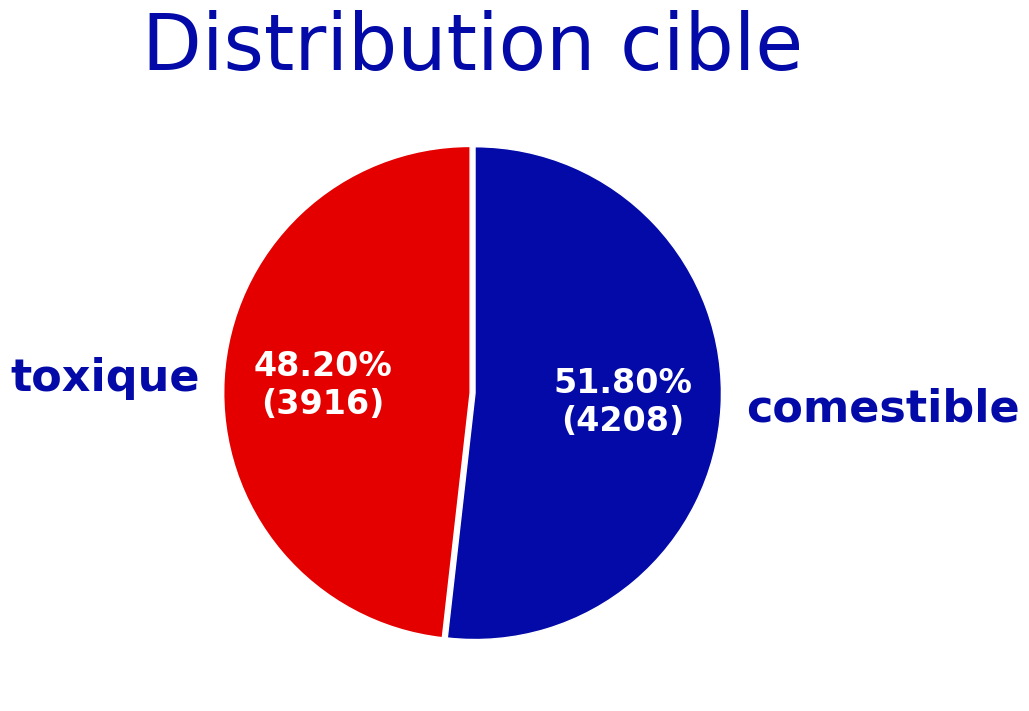

In [19]:
radius,size=0.8,0.3
fig,ax = plt.subplots(ncols=1,figsize=(8,8), subplot_kw=dict(aspect="equal"))

affichage = donnees.groupby(cible).cap_shape.count().reset_index().rename(columns={'cap_shape':'nombre'})
affichage['%'] = affichage.nombre * 100 / affichage.nombre.sum()
affichage

wedges, texts, autotexts =  ax.pie(
         affichage['nombre'],
         autopct=lambda pct: formatPct(pct, affichage.nombre.values),   # autopct='%1.2f%%', 
         labels=affichage['cible'].values,
         # shadow=True, 
         counterclock=False,
         startangle=90 ,
         colors = palette,
         # pctdistance=0.4, 
         labeldistance=1.1, 
         textprops=dict(color="#030aa7"),
         explode=[0.01 for _ in range(affichage['cible'].count())]
      );
plt.setp(autotexts, size=24, weight="bold",color="w")
plt.setp(texts, size=32, weight="bold");
ax.set_title("Distribution cible",fontdict=dict(color="#030aa7", size=56));

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonInitial.png" width="800">

In [20]:
X = donnees[qualitatives].copy()
for colonne in X.columns:
    X[colonne] = X[colonne].apply(lambda x : dictNValeurs[colonne][x])
    
y = donnees[cible].apply(lambda x : dictNValeurs[cible][x])

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Separation des données pour l'apprentissage</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonTraitementValidation.png" width="800">

<div style='padding:15px;color:#030aa7;font-size:120%;text-align: left'>L'échantillon validation <b>1024</b> individus</div>

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Separation des données pour l'apprentissage</div></b>

<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/classification/echantillonApprentissageTest.png" width="800">

<div style='padding:15px;color:#030aa7;font-size:120%;text-align: left'>L'échantillon validation <b>1024</b> individus</div>

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(24,16))
afficheSeparationsBinaires(donneesXy, palette, ax, cible=cible)